In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import networkx as nx
from matplotlib import pyplot as plt

In [3]:
G = nx.Graph() # For creating empty graph

In [4]:
G.add_node(1) # Simple way to add node
G.add_node(2)
G.add_edge(1,2,weight=15)

In [5]:
pos = nx.spring_layout(G)

{(1, 2): Text(0.0, 0.0, '15')}

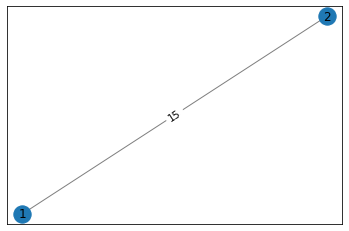

In [6]:
labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos,alpha=0.5)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [7]:
N = nx.Graph()

N.add_node(1)
N.add_node(2)
N.add_node(3)
N.add_node(4)
N.add_node(5)
N.add_node(6)
N.add_node(7)

In [8]:
N.add_edge(1,2,weight=28)
N.add_edge(1,6,weight=10)
N.add_edge(2,3,weight=16)
N.add_edge(2,7,weight=14)
N.add_edge(3,4,weight=12)
N.add_edge(4,7,weight=18)
N.add_edge(7,5,weight=24)
N.add_edge(5,4,weight=22)
N.add_edge(6,5,weight=25)

{(1, 2): Text(0.3206451754858493, -0.7058247535419153, '28'),
 (1, 6): Text(-0.42196348498912484, -0.7204352512705348, '10'),
 (2, 3): Text(0.7635883158463705, 0.0056449624523464415, '16'),
 (2, 7): Text(0.2779090176430379, -0.08352173079436158, '14'),
 (3, 4): Text(0.47521411622524784, 0.6378551399831397, '12'),
 (4, 7): Text(-0.010465181978084825, 0.5486884467364317, '18'),
 (4, 5): Text(-0.32939776311801083, 0.5924872660706353, '22'),
 (5, 7): Text(-0.34338671661839454, 0.2884048648293111, '24'),
 (5, 6): Text(-0.7836322239718623, -0.054333409188777465, '25')}

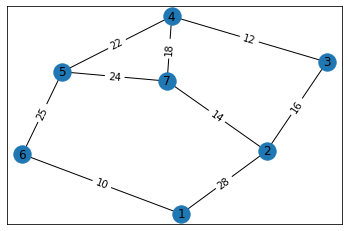

In [9]:
pos = nx.spring_layout(N)

labels = nx.get_edge_attributes(N,'weight')

nx.draw_networkx_nodes(N,pos)
nx.draw_networkx_edges(N,pos)
nx.draw_networkx_labels(N,pos)
nx.draw_networkx_edge_labels(N,pos,edge_labels=labels)

In [10]:
print("No of nodes : ",N.number_of_nodes()) # For count of no of nodes in  graph

print("No of edges : ",N.number_of_edges()) # Count of no of edges in graph

No of nodes :  7
No of edges :  9


In [11]:
list(N.nodes()) # Gives list of all nodes in graph  

[1, 2, 3, 4, 5, 6, 7]

In [12]:
N.edges() # Gives all the list of edges in graph

EdgeView([(1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (4, 7), (4, 5), (5, 7), (5, 6)])

In [13]:
dict(N.adj[1][2])

{'weight': 28}

In [14]:
# Prim's Algorithm Logic starts from here

# Logic for finding minimum edge from graph
min = (0,0)
elist = list(N.edges)
min = elist[0]
for i in range(1,len(elist)):
    curr_edge = elist[i]

    curr_edge_weight = dict(N.adj[curr_edge[0]][curr_edge[1]])
    min_edge_weight = dict(N.adj[min[0]][min[1]])
    # print(curr_edge_weight['weight']) 
    if curr_edge_weight['weight'] < min_edge_weight['weight']:
        min = curr_edge
print(min)

(1, 6)


In [15]:
MST = nx.Graph()
MST.add_edge(min[0],min[1])


In [20]:
# print(list(MST.nodes()))
# list(MST.edges())

min_set = min
for i in range(len(N.edges())-1):
    mst_nodes = list(MST.nodes())
    print("mst nodes: ", mst_nodes)

    for n in range(len(mst_nodes)):
        curr_adj = list(N.adj[mst_nodes[n]])
        print("curr adj : ",curr_adj)
        for k in range(len(curr_adj)):
            f = mst_nodes[n]
            s = curr_adj[k]
            selected_set = (f,s)
            # print(mst_nodes[n],curr_adj[k])
            curr_edge_weight = N.adj[f][s]
            # print(curr_edge_weight['weight'])
            present_edges = list(N.edges)
            # print(present_edges)
            # print(selected_set)
            if s not in mst_nodes:
                print(s)
                # print(selected_set)
                if min_set in list(MST.edges()):
                    min_set = selected_set
                    # print("executes")
                else:
                    curr_edge_weight = N.adj[f][s]
                    min_edge_weight = N.adj[min_set[0]][min_set[1]]
                    if curr_edge_weight['weight'] <= min_edge_weight['weight']:
                        min_set = selected_set
    print("min set:",min_set)       
    MST.add_edge(min_set[0],min_set[1])
    

mst nodes:  [1, 6]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
5
min set: (6, 5)
mst nodes:  [1, 6, 5]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
4
min set: (5, 4)
mst nodes:  [1, 6, 5, 4]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
curr adj :  [3, 7, 5]
3
7
min set: (4, 3)
mst nodes:  [1, 6, 5, 4, 3]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
curr adj :  [3, 7, 5]
7
curr adj :  [2, 4]
2
min set: (3, 2)
mst nodes:  [1, 6, 5, 4, 3, 2]
curr adj :  [2, 6]
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
curr adj :  [3, 7, 5]
7
curr adj :  [2, 4]
curr adj :  [1, 3, 7]
7
min set: (2, 7)
mst nodes:  [1, 6, 5, 4, 3, 2, 7]
curr adj :  [2, 6]
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
curr adj :  [3, 7, 5]
curr adj :  [2, 4]
curr adj :  [1, 3, 7]
curr adj :  [2, 4, 5]
min set: (2, 7)
mst nodes:  [1, 6, 5, 4, 3, 2, 7]
curr adj :  [2, 6]
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
curr adj :  [3, 7, 5]
curr adj :  [2, 4]
curr adj :  [1, 3, 7]
curr ad

In [17]:
MST.edges()

EdgeView([(1, 6)])

{1: Text(0.7784964156269966, 0.5875302853640899, '1'),
 6: Text(0.7202593446649954, 0.2531582586256094, '6'),
 5: Text(0.46432808227278793, -0.053855966635060704, '5'),
 4: Text(0.09209900033516527, -0.2535843614637907, '4'),
 3: Text(-0.3304771895732463, -0.3023627852425612, '3'),
 2: Text(-0.7247056533266989, -0.21768528313800586, '2'),
 7: Text(-1.0, -0.01320014751028095, '7')}

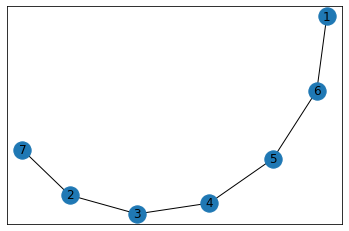

In [21]:
pos = nx.spring_layout(MST)
nx.draw_networkx_nodes(MST,pos)
nx.draw_networkx_edges(MST,pos)
nx.draw_networkx_labels(MST,pos)

In [22]:
# Prim's Algorithm logic end here

In [23]:
# Kruskals Algorithm logic starts

[(2, 7), (2, 3), (3, 4), (4, 5), (5, 6), (1, 6)]


{2: Text(-0.6565799626099919, 0.6688307468995045, '2'),
 7: Text(-0.9712473989632027, 0.894260274800075, '7'),
 3: Text(-0.30148201864580204, 0.3782404467009034, '3'),
 4: Text(0.04960472825430378, 0.04774121701073565, '4'),
 5: Text(0.3724631471707518, -0.314038736321037, '5'),
 6: Text(0.6493082370258494, -0.675033949090181, '6'),
 1: Text(0.8579332677680918, -1.0, '1')}

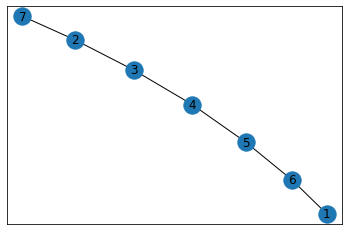

In [41]:
# Logic for finding minimum edge from graph

NMST = nx.Graph()
mst_arr = []

min = (0,0)
elist = list(N.edges)
for k in range(len(elist)):
    min = elist[0]
    min_edge_weight = dict(N.adj[min[0]][min[1]])
    for i in range(1,len(elist)):
        curr_edge = elist[i]
        # print(curr_edge)
        if curr_edge not in mst_arr:
            # print("curr edge:",curr_edge)
            curr_edge_weight = dict(N.adj[curr_edge[0]][curr_edge[1]])
            min_edge_weight = dict(N.adj[min[0]][min[1]])
            # print(curr_edge_weight['weight']) 
            if curr_edge_weight['weight'] < min_edge_weight['weight']:
                has_in = False
                second = False
                for j in mst_arr:
                    # print("j=",j[1],"ce=",curr_edge[0])
                    if j[1] == curr_edge[0]:
                        has_in = True
                    if j[1] == curr_edge[1]:
                        second = True
                if has_in != second:
                    # print(has_in)
                    min = curr_edge
                    min_edge_weight = curr_edge_weight['weight']
    # print(min)
    mst_arr.append((min[0],min[1]))
    # NMST.add_edge(min[0],min[1],weight=min_edge_weight)
# print(NMST.edges())
# print(mst_arr.count(min))
for i in range(mst_arr.count(min)):
    mst_arr.remove(min)
print(mst_arr)
NMST.add_edges_from(mst_arr)
NMST.edges()
pos = nx.spring_layout(NMST)
nx.draw_networkx_nodes(NMST,pos)
nx.draw_networkx_edges(NMST,pos)
nx.draw_networkx_labels(NMST,pos)